# Pricing of Houses

In this exercise I will be estimating what thr price of a house should be, based off the given features. There are over 21000 samples and the data was gotten from kaggle. There is a Longitude and Latitude column, i'll show how such can be engineered to suit our model and aid in predicting the prices of houses. Alot of feature engineering would be done in this exercise.
\
\
THE DATA \
We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

Feature Columns \
id - Unique ID for each home sold \
date - Date of the home sale \
price - Price of each home sold \
bedrooms - Number of bedrooms \
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower \
sqft_living - Square footage of the apartments interior living space \
sqft_lot - Square footage of the land space \
floors - Number of floors \
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not \
view - An index from 0 to 4 of how good the view of the property was \
condition - An index from 1 to 5 on the condition of the apartment \
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. \
sqft_above - The square footage of the interior housing space that is above ground level \
sqft_basement - The square footage of the interior housing space that is below ground level \
yr_built - The year the house was initially built \
yr_renovated - The year of the house’s last renovation \
zipcode - What zipcode area the house is in \
lat - Lattitude \
long - Longitude \
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors \
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors \

Lets start by importing the necessary  and reading in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('kc_house_data.csv')

In [103]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are no missing values, now lets explore the dataset

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

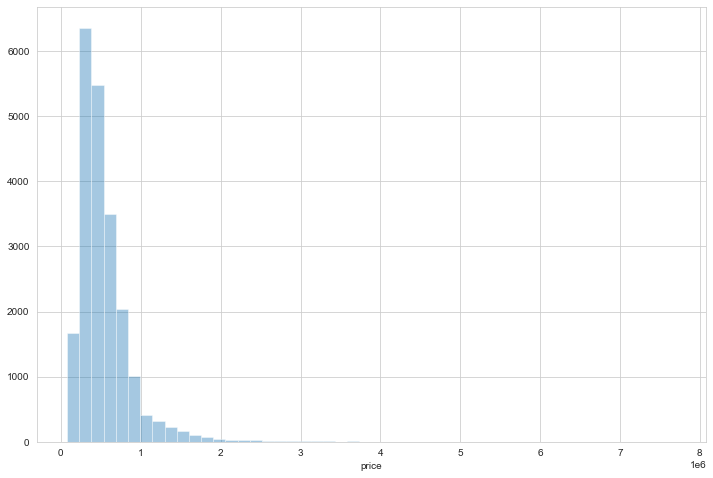

In [105]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.distplot(df['price'],kde=False)

Most of the houses are in the range of 0 - 1,000,000, but there are some outliers, we'll explore that soon

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

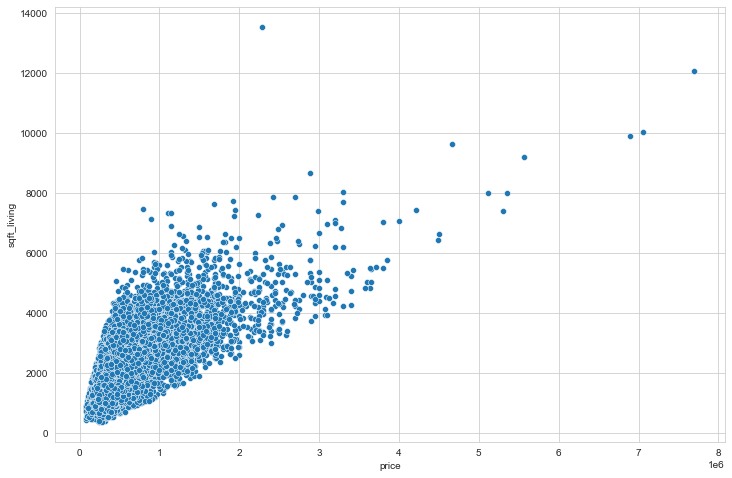

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

As expected, the size of the interior of the house is diretly proportional to the price of the house

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

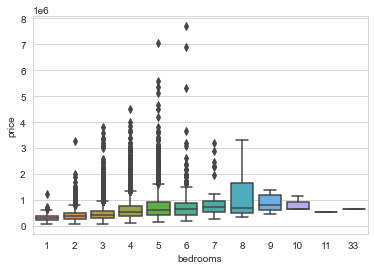

In [107]:
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

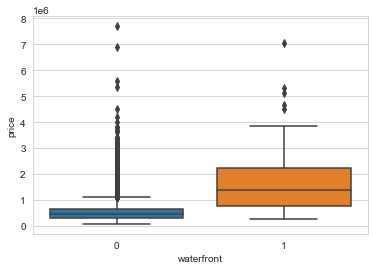

In [108]:
sns.boxplot(x='waterfront',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

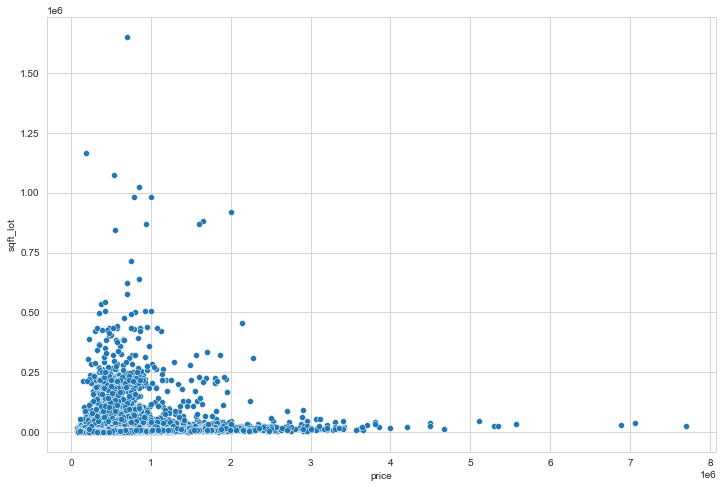

In [109]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_lot',data=df)

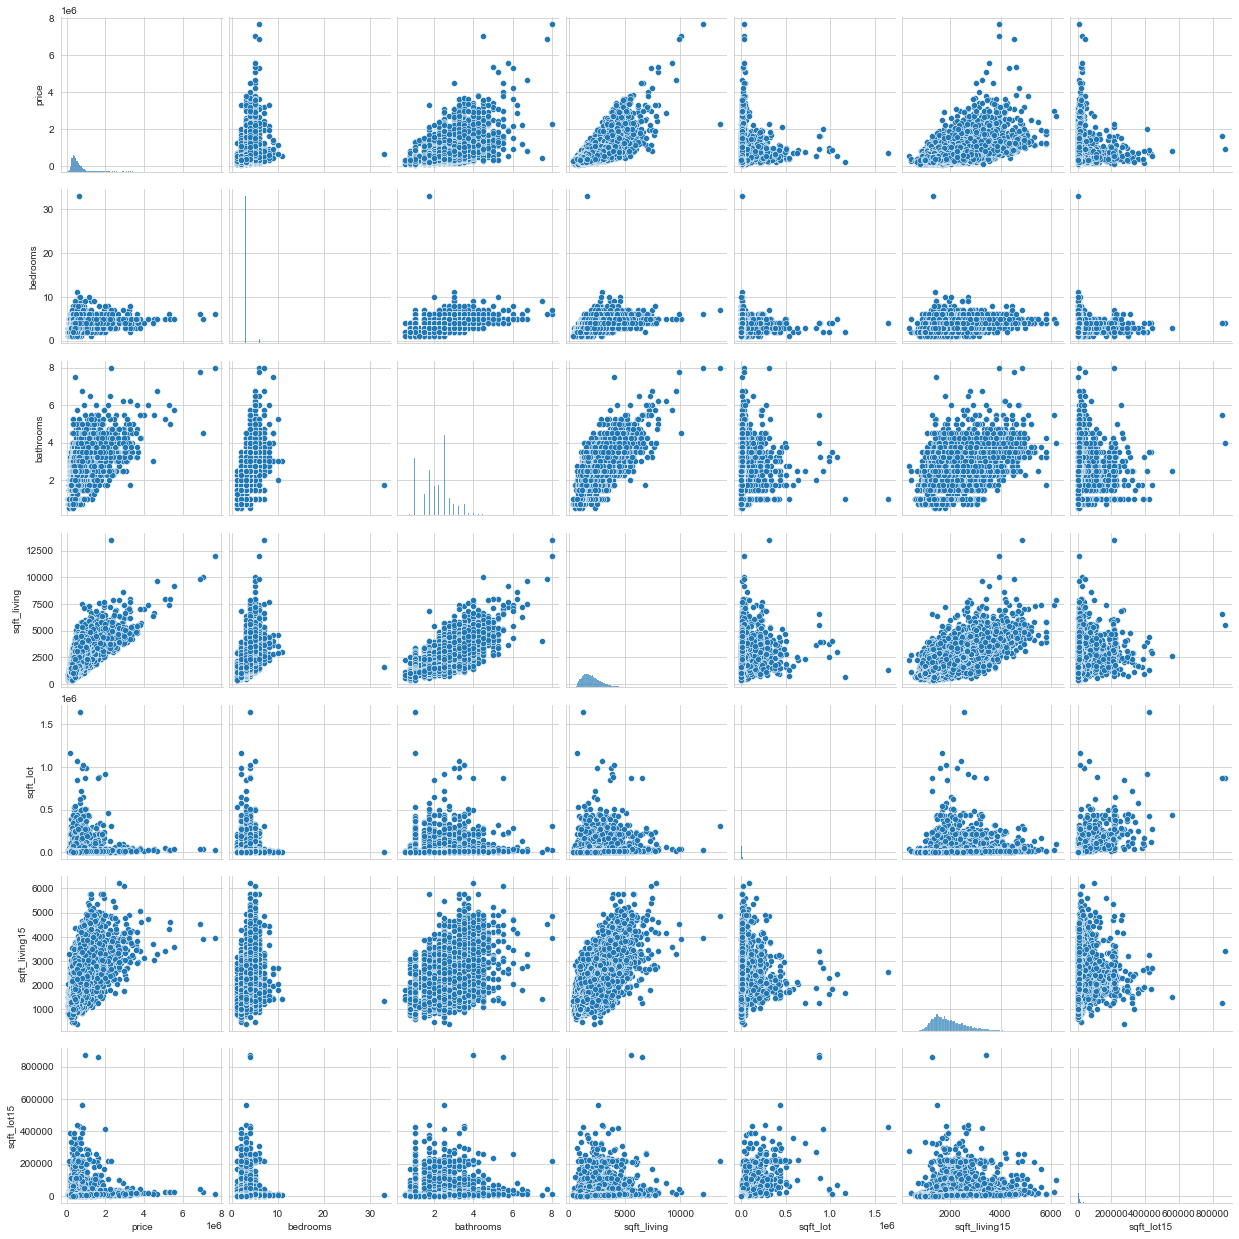

In [110]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','sqft_living15', 'sqft_lot15']])

Checking for correlation amongst the features and as usual, we would have to drop any highly correlated features

<AxesSubplot:>

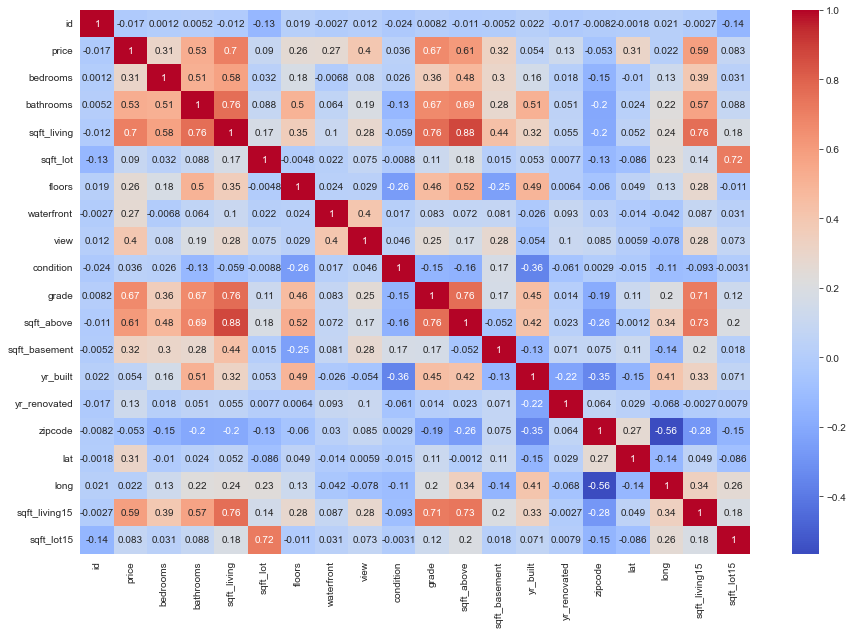

In [111]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [112]:
df.drop('sqft_above',axis=1, inplace = True)

Coming back to the issue of outliers, lets check out the top 20 prices 

In [113]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,0,2001,0,98004,47.6208,-122.219,3720,14592


We can see that after 4000000, the prices after are ridiculous and very few. Seeing the year they were built and the size of the buildings, i assume these are exceptional buildings, maybe old castles with huge sentimental value, or vintage houses of notable people in history. Either way these are very rare cases and leaving them in the data set would affect the model. so i will drop the prices from 4000000 and above since that is not even up to 1% of the entire dataset.

In [114]:
df.drop([7245,3910,9245,4407,1446,1313,1162,8085,2624,8629,12358,4145],axis =0,inplace = True)

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

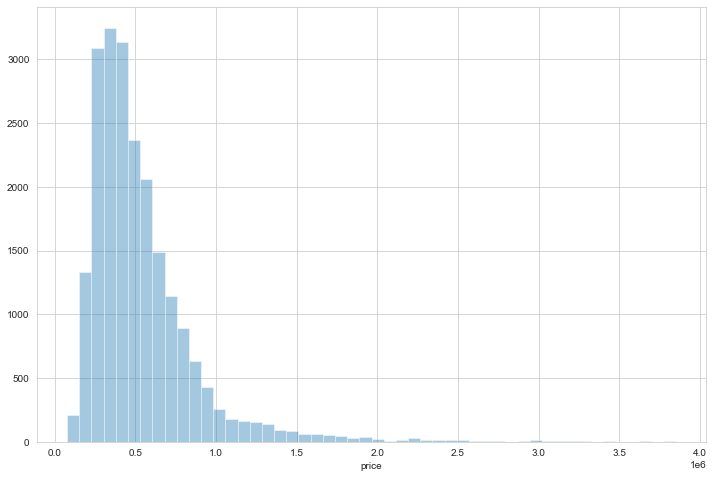

In [115]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'],kde=False)

Lets separate the date into month and year using pandas to_datetime

In [116]:
df['date'] = pd.to_datetime(df['date'])

In [117]:
df['month'] = df['date'].apply(lambda date:date.month)

In [118]:
df['year'] = df['date'].apply(lambda date:date.year)

In [119]:
df.drop('date', axis = 1, inplace = True)

<AxesSubplot:xlabel='year', ylabel='price'>

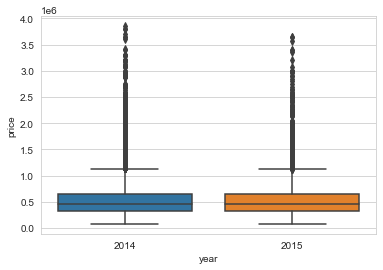

In [120]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

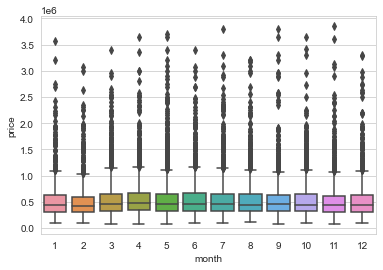

In [121]:
sns.boxplot(x='month',y='price',data=df)

Lets explore this longitude and latitude by ploting them against each other

<AxesSubplot:xlabel='long', ylabel='lat'>

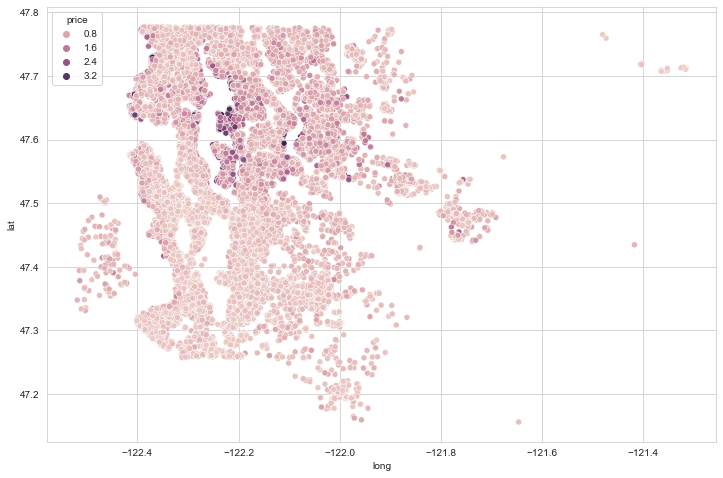

In [122]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

You can see from this plot  that there are regions where the prices of houses are higher than some other regions, especially regions facing the water front. One of the ways of utilising this longitude and latitude and making it useful to our model is by clustering the plot into small groups and labelling these groups, it is not entirely perfect because the cluster might join a region of high pricing with that of low pricing, but it has more advantages than disadvantages. You can keep playing around with the number of clusters till it suits what you need

In [123]:
from sklearn.cluster import KMeans

In [124]:
kmeans = KMeans(n_clusters=14)

In [125]:
kmeans.fit(df[['long','lat']])

KMeans(n_clusters=14)

<AxesSubplot:xlabel='long', ylabel='lat'>

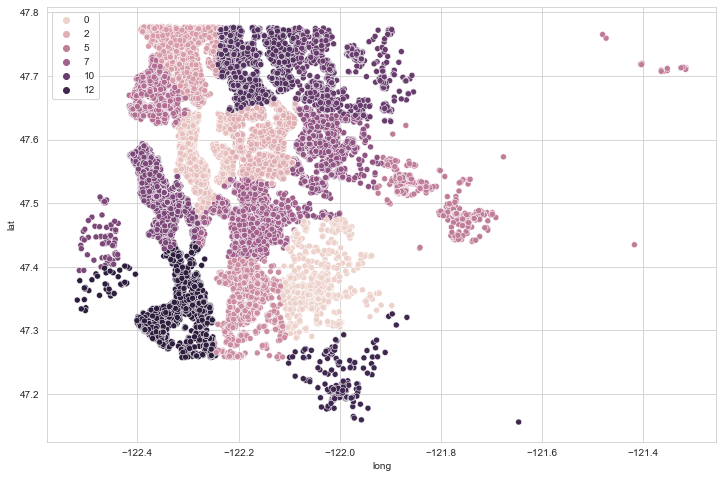

In [126]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue=kmeans.labels_)

The above plot are the clusters created and to a good extent its a good representation of the price distribution.now we can add this to the dataframe as a new feature and remove the longitude and latitude columns

In [127]:
df['location'] = kmeans.labels_

In [128]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,location
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,3
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,11
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,5,2014,6
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2,2015,9
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,6,2014,1
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,1,2015,8


<AxesSubplot:xlabel='location', ylabel='price'>

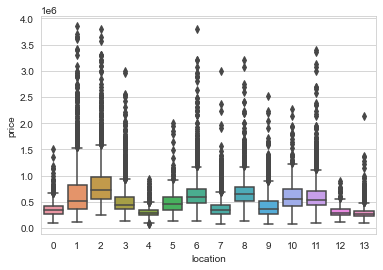

In [129]:
sns.boxplot(x='location',y='price',data=df)

In [130]:
df.drop(['long','lat'],axis = 1, inplace = True)

Lets look at 'sqft_basement' and see what insight and feature engineering we can perform on it

In [131]:
df['sqft_basement'].nunique()

301

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_basement'>

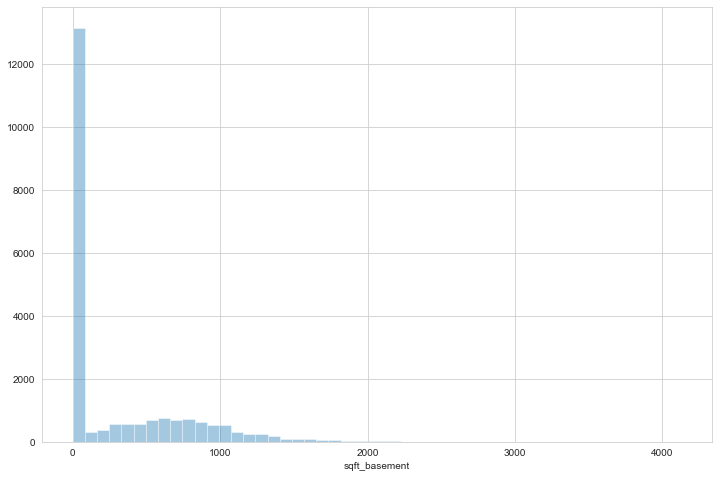

In [132]:
plt.figure(figsize=(12,8))
sns.distplot(df['sqft_basement'],kde=False)

From the plot above, majority of the houses dont have basement, hence they're represented with 0. it wont be right to leave the values as they are bacause the model would put too much weight on those with basement because of the huge difference in value. For this reason i would cluster the values with increasing size of basement.

In [133]:
df['sqft_basement'].max()

4130

In [134]:
def basement(x):
    if x == 0:
        return x
    elif 0 < x < 300:
        return 1
    elif 299 < x < 600:
        return 2
    elif 599 < x < 900:
        return 3
    elif 899 < x < 1200:
        return 4
    else:
        return 5

In [135]:
df['sqft_basement'] = df['sqft_basement'].apply(basement)

Lets explore 'yr_built' column

<AxesSubplot:xlabel='price', ylabel='yr_built'>

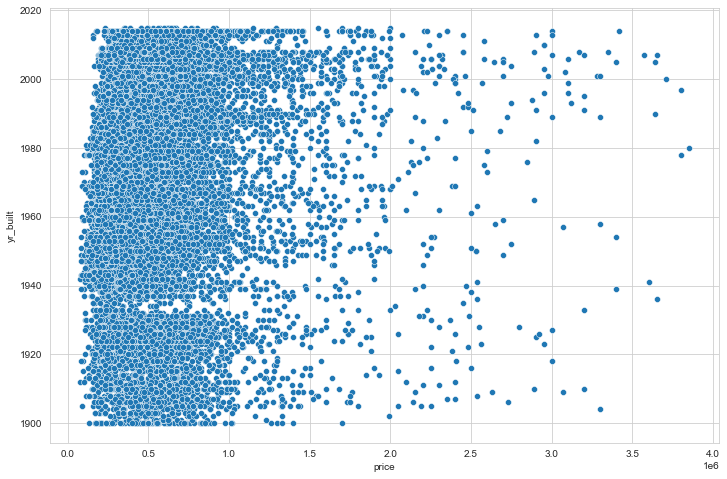

In [136]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='yr_built',data=df)

There is almost no correlation with the year a house was built and the price, thus i will remove this feature

In [137]:
df.drop('yr_built', axis = 1, inplace = True)

Lets explore 'yr_renovated'

In [138]:
df['yr_renovated'].value_counts()

0       20674
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

From the above information, most of the houses have'nt been renovated before and they are repesented by 0. For the same reason as in the case of 'sqft_basement', i cant leave the values like that bacause the model would put alot more weight on those that have been renovated beause of the difference in value. Since the houses that havent been renovated account for about 95% of the data set, i would represent the feature into renovated and not renovated.

In [139]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x : x if x == 0 else 1)

In [140]:
df['zipcode'].nunique()

70

There really isnt any much insight from the zipcode, so i will remove it

In [141]:
df.drop('zipcode', axis = 1, inplace = True)

In [142]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,month,year,location
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,0,1340,5650,10,2014,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2,1,1690,7639,12,2014,3
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,0,2720,8062,2,2015,11
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,4,0,1360,5000,12,2014,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,0,1800,7503,2,2015,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,0,1530,1509,5,2014,6
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,0,1830,7200,2,2015,9
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,0,1020,2007,6,2014,1
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,0,1410,1287,1,2015,8


One thing i do in most of my feature engineering is making sure the numerical columns have a gausian distribution, as it really helps to improve the model

To do this i usually do a power transform manually on each column, i.e raising the column to a power that makes the distribution more gausian

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living'>

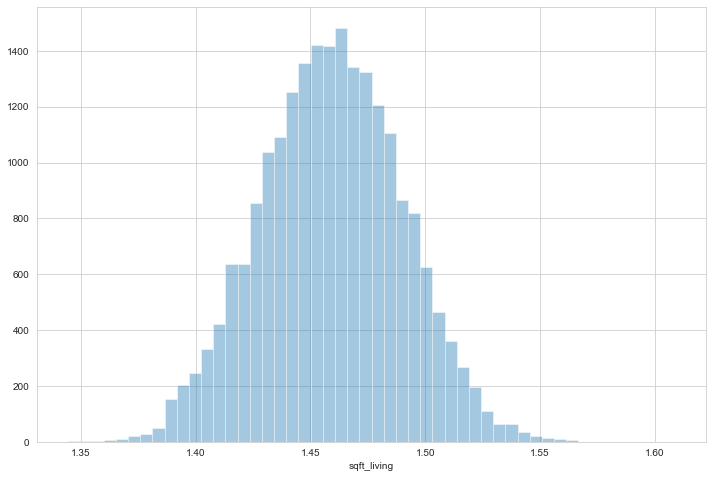

In [143]:
plt.figure(figsize=(12,8))
sns.distplot(df['sqft_living']**0.05,kde=False)

In [144]:
df['sqft_living']=df['sqft_living']**0.05

<AxesSubplot:xlabel='sqft_lot'>

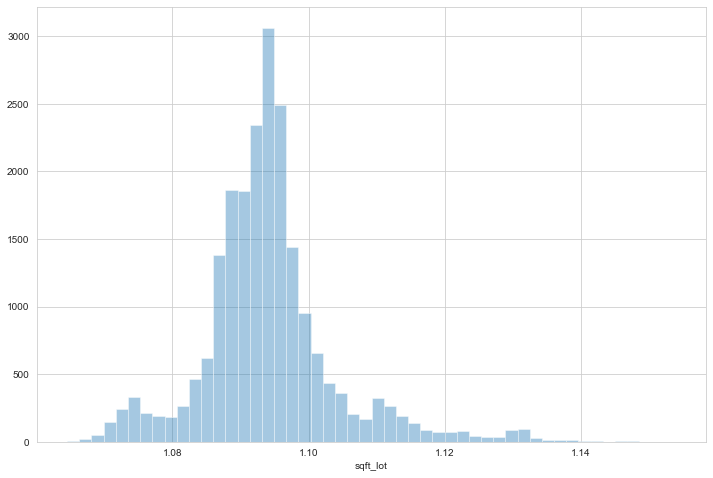

In [145]:
plt.figure(figsize=(12,8))
sns.distplot(df['sqft_lot']**0.01,kde=False)

In [146]:
df['sqft_lot']=df['sqft_lot']**0.01

<AxesSubplot:xlabel='sqft_living15'>

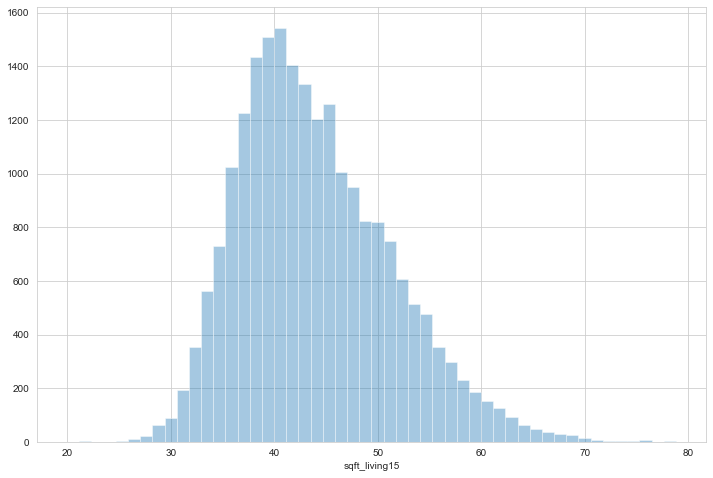

In [147]:
plt.figure(figsize=(12,8))
sns.distplot(df['sqft_living15']**0.5,kde=False)

In [148]:
df['sqft_living15'] = df['sqft_living15']**0.5

<AxesSubplot:xlabel='sqft_lot15'>

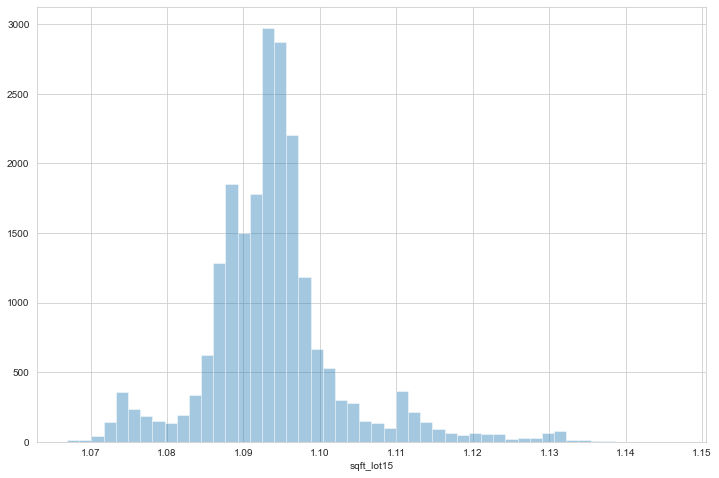

In [149]:
plt.figure(figsize=(12,8))
sns.distplot(df['sqft_lot15']**0.01,kde=False)

In [150]:
df['sqft_lot15'] = df['sqft_lot15']**0.01

After all the feature engineering, lets check again the correlation and remove the highly correlated ones

<AxesSubplot:>

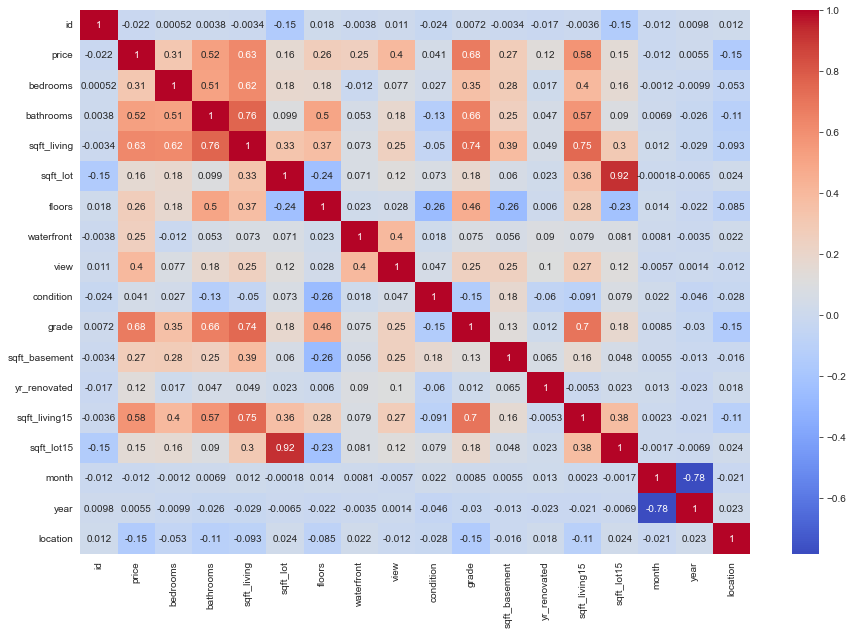

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [151]:
df.drop(['sqft_lot15','month'], axis = 1, inplace = True)

In [152]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,sqft_living15,year,location
0,7129300520,221900.0,3,1.00,1.424276,1.090236,1.0,0,0,3,7,0,0,36.606010,2014,1
1,6414100192,538000.0,3,2.25,1.480801,1.092946,2.0,0,0,3,7,2,1,41.109610,2014,3
2,5631500400,180000.0,2,1.00,1.394198,1.096478,1.0,0,0,3,6,0,0,52.153619,2015,11
3,2487200875,604000.0,4,3.00,1.460874,1.088904,1.0,0,0,5,7,4,0,36.878178,2014,9
4,1954400510,510000.0,3,2.00,1.449658,1.094143,1.0,0,0,3,8,0,0,42.426407,2015,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1.442894,1.072839,3.0,0,0,3,8,0,0,39.115214,2014,6
21593,6600060120,400000.0,4,2.50,1.472925,1.090546,2.0,0,0,3,8,0,0,42.778499,2015,9
21594,1523300141,402101.0,2,0.75,1.413937,1.074740,2.0,0,0,3,7,0,0,31.937439,2014,1
21595,291310100,400000.0,3,2.50,1.446126,1.080887,2.0,0,0,3,8,0,0,37.549967,2015,8


Now lets change the categorical features to dummy variables, it seems location is the only categorical feature

In [153]:
df['location']=df['location'].apply(lambda x:str(x))

In [154]:
location = pd.get_dummies(df['location'],drop_first=True)

In [155]:
df.drop('location',axis = 1, inplace = True)

In [156]:
df = pd.concat([df,location],axis=1)

In [157]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,12,13,2,3,4,5,6,7,8,9
0,7129300520,221900.0,3,1.00,1.424276,1.090236,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,1.480801,1.092946,2.0,0,0,3,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,1.394198,1.096478,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1.460874,1.088904,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,510000.0,3,2.00,1.449658,1.094143,1.0,0,0,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1.442894,1.072839,3.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
21593,6600060120,400000.0,4,2.50,1.472925,1.090546,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
21594,1523300141,402101.0,2,0.75,1.413937,1.074740,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,400000.0,3,2.50,1.446126,1.080887,2.0,0,0,3,...,0,0,0,0,0,0,0,0,1,0


In [158]:
df.drop('id',axis = 1, inplace = True)

In [159]:
X = df.drop('price',axis = 1)

In [160]:
y= df['price']

Now lets split our dataset into training set and test set using train_test_split

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

I like to scale my dataset to put everything in the same range, i do this with minmaxscaler

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scaler = MinMaxScaler()

In [165]:
X_train= scaler.fit_transform(X_train)

In [166]:
X_test = scaler.transform(X_test)

CREATING A MODEL

I will be creating a neural network model for this problem

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [168]:
model = Sequential()

model.add(Dense(26,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [169]:
from tensorflow.keras.callbacks import EarlyStopping

In [170]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [171]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
473/473 [==============================] - 13s 13ms/step - loss: 397704396800.0000 - val_loss: 302975844352.0000
Epoch 2/600
473/473 [==============================] - 2s 3ms/step - loss: 136888049664.0000 - val_loss: 77912662016.0000
Epoch 3/600
473/473 [==============================] - 1s 3ms/step - loss: 75958255616.0000 - val_loss: 69869576192.0000
Epoch 4/600
473/473 [==============================] - 1s 2ms/step - loss: 68897423360.0000 - val_loss: 63661797376.0000
Epoch 5/600
473/473 [==============================] - 1s 2ms/step - loss: 63120900096.0000 - val_loss: 58450976768.0000
Epoch 6/600
473/473 [==============================] - 1s 2ms/step - loss: 58549370880.0000 - val_loss: 54984749056.0000
Epoch 7/600
473/473 [==============================] - 1s 2ms/step - loss: 55206449152.0000 - val_loss: 51784990720.0000
Epoch 8/600
473/473 [==============================] - 1s 2ms/step - loss: 52876095488.0000 - val_loss: 49965400064.0000
Epoch 9/600
473/473 [======

Epoch 135/600
473/473 [==============================] - 1s 2ms/step - loss: 22268106752.0000 - val_loss: 22855133184.0000
Epoch 136/600
473/473 [==============================] - 1s 2ms/step - loss: 22169335808.0000 - val_loss: 22904754176.0000
Epoch 137/600
473/473 [==============================] - 1s 2ms/step - loss: 22166921216.0000 - val_loss: 22764582912.0000
Epoch 138/600
473/473 [==============================] - 1s 2ms/step - loss: 22174584832.0000 - val_loss: 22787299328.0000
Epoch 139/600
473/473 [==============================] - 1s 2ms/step - loss: 22144784384.0000 - val_loss: 22687735808.0000
Epoch 140/600
473/473 [==============================] - 1s 2ms/step - loss: 22162655232.0000 - val_loss: 22694168576.0000
Epoch 141/600
473/473 [==============================] - 1s 2ms/step - loss: 22094350336.0000 - val_loss: 22653120512.0000
Epoch 142/600
473/473 [==============================] - 1s 2ms/step - loss: 22128979968.0000 - val_loss: 22662567936.0000
Epoch 143/600
47

473/473 [==============================] - 1s 2ms/step - loss: 20221435904.0000 - val_loss: 21660121088.0000
Epoch 268/600
473/473 [==============================] - 1s 2ms/step - loss: 20203884544.0000 - val_loss: 21511747584.0000
Epoch 269/600
473/473 [==============================] - 1s 3ms/step - loss: 20197877760.0000 - val_loss: 21528944640.0000
Epoch 270/600
473/473 [==============================] - 1s 3ms/step - loss: 20160223232.0000 - val_loss: 21421443072.0000
Epoch 271/600
473/473 [==============================] - 1s 2ms/step - loss: 20143142912.0000 - val_loss: 21475923968.0000
Epoch 272/600
473/473 [==============================] - 1s 2ms/step - loss: 20165705728.0000 - val_loss: 21576826880.0000
Epoch 273/600
473/473 [==============================] - 1s 2ms/step - loss: 20180176896.0000 - val_loss: 21557501952.0000
Epoch 274/600
473/473 [==============================] - 1s 2ms/step - loss: 20215568384.0000 - val_loss: 21467539456.0000
Epoch 275/600
473/473 [=======

Lets evaluate our model and predict on the test set

<AxesSubplot:>

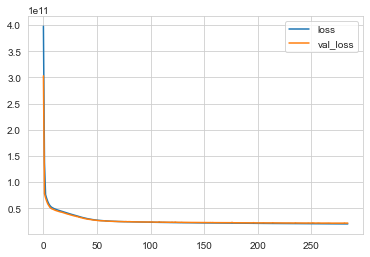

In [172]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [173]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [174]:
predictions = model.predict(X_test)

203/203 [==============================] - 1s 2ms/step


In [175]:
mean_absolute_error(y_test,predictions)

88016.07393887044

In [176]:
np.sqrt(mean_squared_error(y_test,predictions))

146897.0233668279

In [177]:
explained_variance_score(y_test,predictions)

0.8191919968922146

In [178]:
df['price'].mean()

537592.5456567061

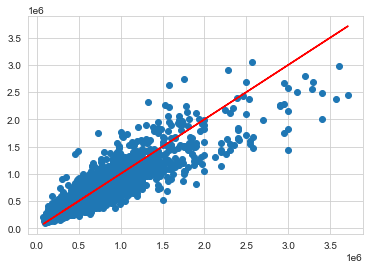

In [179]:
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

This is a good model, though it could be alot better. Some things could be done differently, some features could be droped or engineered better. But on a larger scale, the model performed well. i am open to correction and your suggestion. Thankyou